# Pre-Lecture HW

# Question 1

Summary:

We have been discussing classification decision trees, a type of machine learning algorithm used for classifying data into different categories. You asked for a description of the type of problem they address, real-world applications, and the difference between how they make predictions compared to multiple linear regression.

● Classification Decision Trees are particularly well-suited for problems involving non-linear relationships between predictor and outcome variables where the goal is to categorize data based on these relationships. Some potential applications include:

○ Assessing loan default risk by considering factors like credit scores, income, and employment history.

○ Categorizing migratory birds based on their arrival month, even if the relationship between wingspan and arrival month isn't linear.

● Classification decision trees make predictions by traversing a flow-chart-like structure, evaluating predictor variables at each node to reach a final classification.

● Multiple linear regression, on the other hand, uses a linear equation to model the relationship between predictor and outcome variables and make predictions.
The sources and our conversation primarily focus on the differences between classification decision trees and multiple linear regression. They highlight that the former is more suitable for non-linear relationships and categorical data, while the latter is limited to linear relationships. The specific examples of applications for classification decision trees provided in this summary are not from the sources, and you may wish to independently verify them.

# Question 2

1. A real-world application scenario that might be most appropriately addressed by the accuracy metric might be one where a company wants to know what proportion of emails are correctly classified as either spam or not spam, in other words, to evaluate the performance of a spam detection model. Accuracy is a suitable metric for assessing the effectiveness of a spam filter because it provides a general overview of the model's performance, indicating its overall effectiveness. A higher accuracy indicates a more effective spam detection model. Accuracy considers both true positives and true negatives, which are relevant in the spam detection context. The company wants to understand the proportion of emails correctly classified, regardless of whether they are spam or not. Accuracy provides a single metric for evaluating the model's performance.

2. A real-world application scenario that might be most appropriately addressed by the sensitivity metric might be one where a hospital is using a model to identify patients who are at risk of developing a life-threatening condition. They want to ensure that as many at-risk patients as possible are correctly identified, even if it means some false positives. Sensitivity is the most appropriate metric for this scenario, as it measures the proportion of actual positives correctly identified. Minimizing false negatives is crucial, as it could lead to delayed treatment and negative health outcomes. High sensitivity for critical cases ensures the model captures the majority of at-risk patients, minimizing the risk of missing critical cases. Although some false positives may occur, the cost of missing a truly at-risk patient outweighs the cost of false positives. Additional screening or diagnostic procedures may be needed to confirm the model's predictions and avoid unnecessary interventions for patients not at risk.

3. A real-world application scenario that might be most appropriately addressed by the specificity metric might be one where a security company uses a facial recognition model to control access to a secure facility, aiming to prevent unauthorized individuals from gaining access. Specificity, which measures the proportion of actual negatives correctly identified, directly addresses this need. It indicates how effectively the model can correctly identify individuals who are not authorized to enter the facility.The company prioritizes high specificity, which measures the proportion of actual negatives correctly identified, to ensure the model is exceptionally accurate in recognizing individuals who should be denied access. False positives can lead to significant security breaches, such as theft of sensitive information, damage to property or infrastructure, and harm to personnel. Balancing specificity and sensitivity is crucial in practical applications, as increasing specificity may decrease sensitivity, and vice versa. The company must carefully consider this trade-off and determine the acceptable level of each metric based on the specific security requirements and operational constraints of the facility.

4. A real-world application scenario that might be most appropriately addressed by the specificity metric might be one where a marketing team uses a model to identify potential customers for an ad campaign, aiming to maximize the effectiveness of their budget by targeting only the most promising leads. Precision is the ideal metric, as it measures the accuracy of the model in identifying individuals who are genuinely interested in the product or service being advertised. High precision is crucial for maximizing return on investment, as it ensures the marketing team focuses on the most promising leads, minimizing wasted advertising resources. However, precision must also consider sensitivity, balancing reaching a broad audience with targeting the most promising leads. The specific goals and constraints of the advertising campaign also influence the desired level of precision, with a limited budget campaign prioritizing higher precision to maximize the impact of each advertising dollar.

Summary:

This conversation explored the rationale behind using accuracy, sensitivity, specificity, and precision as performance metrics in different scenarios. The discussion was based on previous interactions and did not draw directly from the provided source documents.

Accuracy in Spam Detection

Accuracy, which measures the proportion of correctly classified instances, is suitable for evaluating spam detection models when the goal is to understand the overall effectiveness of the filter in distinguishing spam from legitimate emails. The focus is on maximizing correct classifications for both spam and non-spam emails.

Sensitivity for Identifying At-Risk Patients

Sensitivity is crucial when the priority is to identify as many true positive cases as possible. In a healthcare setting, this means correctly identifying patients at risk of a life-threatening condition, even if it leads to some false positives. Minimizing false negatives (failing to identify at-risk patients) is paramount in such scenarios, as the potential consequences of missing a critical case outweigh the costs of false positives.

Specificity for Secure Facility Access

Specificity is essential when the primary goal is to minimize false positives. In a security scenario, this means ensuring that unauthorized individuals are not granted access to a secure facility. The potential consequences of a security breach due to a false positive (granting access to an unauthorized individual) far outweigh the inconvenience of false negatives (denying access to authorized individuals).

Precision for Targeted Advertising

Precision is the preferred metric when the focus is on minimizing wasted resources by targeting only the most promising leads. In marketing and advertising, this means accurately identifying individuals genuinely interested in a product or service, thereby maximizing the return on investment (ROI) for the advertising budget. Minimizing false positives (identifying individuals as potential customers when they are not) is key to achieving this goal.

General Considerations

While these metrics provide valuable insights into model performance, it's important to remember that:

● The choice of the most appropriate metric depends on the specific goals and priorities of the task at hand.

● There is often a trade-off between different metrics, and finding the optimal balance requires careful consideration of the costs and benefits associated with different types of errors.

● It's essential to evaluate models using multiple metrics to gain a comprehensive understanding of their strengths and weaknesses.

# Question 3

       List Price    NumPages
count  319.000000  319.000000
mean    18.362978  334.272727
std     13.976755  161.601510
min      1.500000   24.000000
25%     13.890000  208.000000
50%     15.000000  320.000000
75%     19.360000  416.000000
max    139.950000  896.000000
Hard_or_Paper
P    233
H     86
Name: count, dtype: int64


<Axes: title={'center': 'List Price'}, xlabel='Hard_or_Paper'>

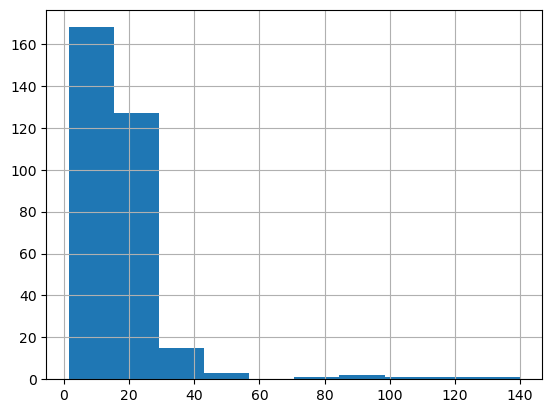

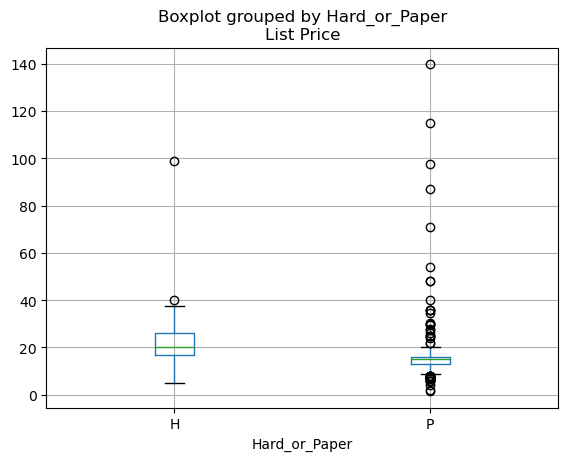

In [4]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, make_scorer
import graphviz as gv

url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
df = pd.read_csv(url, encoding="ISO-8859-1")

# Pre-processing
df = df.drop(['Weight_oz', 'Width', 'Height'], axis=1)
df = df.dropna()  # Removing rows with NaN entries
df['Pub year'] = df['Pub year'].astype(int)
df['NumPages'] = df['NumPages'].astype(int)
df['Hard_or_Paper'] = df['Hard_or_Paper'].astype('category')

# Summary statistics for List Price and NumPages:
print(df[['List Price', 'NumPages']].describe())

# Histogram of List Price:
df['List Price'].hist()

# Summary of Hard_or_Paper:
print(df['Hard_or_Paper'].value_counts())

# Box plot of List Price grouped by Hard_or_Paper:
df.boxplot(column='List Price', by='Hard_or_Paper')

# Question 4

In [6]:
# I'm going to use df.sample(...), like in the tutorial

import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, make_scorer
import graphviz as gv

url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
df = pd.read_csv(url, encoding="ISO-8859-1")

df = df.drop(['Weight_oz', 'Width', 'Height'], axis=1)
df = df.dropna()  # Removing rows with NaN entries
df['Pub year'] = df['Pub year'].astype(int)
df['NumPages'] = df['NumPages'].astype(int)
df['Hard_or_Paper'] = df['Hard_or_Paper'].astype('category')

# The random seed will be set to 130 for the sake of reproducibility
np.random.seed(130)

# 80% training set:
ab_reduced_noNaN_train = df.sample(frac=0.8)

# 20% testing set
ab_reduced_noNaN_test = df.drop(ab_reduced_noNaN_train.index)

# Number of observations:
print("Number of observations in training set:", len(ab_reduced_noNaN_train))
print("Number of observations in testing set:", len(ab_reduced_noNaN_test))


Number of observations in training set: 255
Number of observations in testing set: 64


After running the code, there are 255 observations in the training set, and 64 observations in the test set. This makes sense as it is a 80/20 split of a total of 319 observations. I set the random seed to 130 to insure that the code produces the same split everytime it's run.

The y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H'] step creates the target variable (y) for the classification model. The pd.get_dummies() function converts the categorical variable "Hard_or_Paper" into binary indicator variables. It then creates a new DataFrame with columns for each unique value in the "Hard_or_Paper" column, each containing 1's and 0's indicating the book's type (hardcover or paperback). The ['H'] at the end selects the column representing hardcover books, resulting in a series of 1's and 0's. 

The X = ab_reduced_noNaN[['List Price']] step creates the predictor variable (X) for the model. It stores the "List Price" column in X after selecting it from the ab_reduced_noNaN DataFrame. This means that "List Price" will be used to determine whether a book is paperback or hardback. A DataFrame is returned when a single column is selected using the double square brackets [['List Price']]. If you used single brackets ['List Price'], it would return a Series, which might cause issues with the model fitting process.

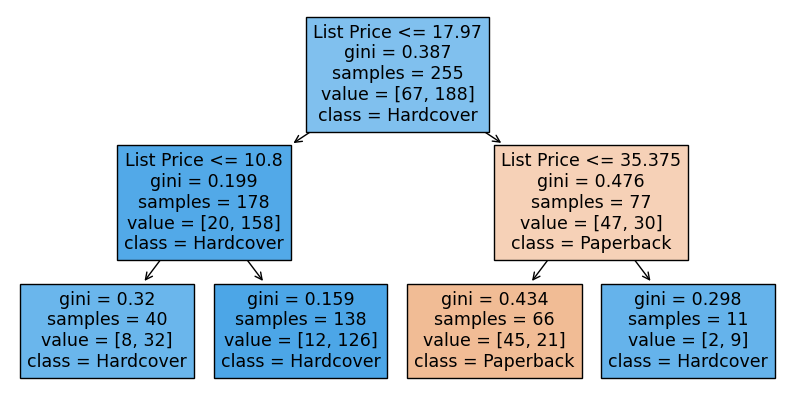

In [7]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, make_scorer
import graphviz as gv

url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
df = pd.read_csv(url, encoding="ISO-8859-1")

df = df.drop(['Weight_oz', 'Width', 'Height'], axis=1)
df = df.dropna()  # Removing rows with NaN entries
df['Pub year'] = df['Pub year'].astype(int)
df['NumPages'] = df['NumPages'].astype(int)
df['Hard_or_Paper'] = df['Hard_or_Paper'].astype('category')

# The random seed will be set to 130 for the sake of reproducibility
np.random.seed(130)

# 80% training set
ab_reduced_noNaN_train = df.sample(frac=0.8)

# 20% testing set
ab_reduced_noNaN_test = df.drop(ab_reduced_noNaN_train.index)

# DecisionTreeClassifier object:
clf = DecisionTreeClassifier(max_depth=2)

# Training:
clf.fit(ab_reduced_noNaN_train[['List Price']], ab_reduced_noNaN_train['Hard_or_Paper'])

# Visualization:
plt.figure(figsize=(10, 5))
plot_tree(clf, feature_names=['List Price'], class_names=['Paperback', 'Hardcover'], filled=True)
plt.show()

The tree.plot_tree(clf) function is a tool used to visualize a trained decision tree model, which makes predictions based on "List Price" for classifying books as hardcover or paperback. The tree diagram consists of nodes, with the top node being the root node and the bottom nodes being leaf or terminal nodes. Each node contains a decision rule based on "List Price," such as "List Price <= 18.945". The branches connecting nodes represent possible outcomes of a decision rule. The model classifies books based on three decision rules: root node, second level nodes, and leaf nodes. The root node splits data based on "List Price <= 18.945," which is less than or equal to $18.945. The second level nodes further split data based on additional rules, such as "List Price <= 10.745" and "List Price <= 37.595". The leaf nodes represent the final predictions, with a leaf node with a majority class label.

Summary:

The conversation centered around preparing data for and training a Decision Tree model to predict whether a book is hardcover or paperback based on its list price.

● Data Preparation: The initial focus was on understanding two code snippets crucial for preparing data for a DecisionTreeClassifier model.

○ y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H'] creates the target variable (y) for the model, converting the "Hard_or_Paper" column into binary indicator variables and selecting the 'H' (Hardcover) column.

○ X = ab_reduced_noNaN[['List Price']] creates the predictor variable (X) for the model, selecting the "List Price" column as a DataFrame.

● Training the Model: The next step involved writing code to train the DecisionTreeClassifier (clf) using "List Price" to predict "Hard_or_Paper" with a max_depth of 2.

○ This included using train_test_split() for model evaluation, as emphasized in the sources.

● Interpreting the Model: Finally, the conversation focused on interpreting the decision tree visualization produced by tree.plot_tree(clf). This involved understanding:

○ Nodes: Represent decision points in the tree, with the root node at the top and leaf nodes at the bottom, providing the final predictions.

○ Decision Rules: Each node (except leaf nodes) contains a decision rule based on "List Price."

○ Branches: Represent the outcomes of decision rules.

○ Class Labels: Leaf nodes show the predicted class (Hardcover or Paperback).

● Key Points from the Discussion:

○ The max_depth=2 parameter limits tree complexity to prevent overfitting.

○ The model needs to be evaluated on the testing set to assess its generalization capability using metrics like sensitivity, specificity, and accuracy.

○ The tree.plot_tree() function visually represents the decision logic, helping us understand how "List Price" is used to classify books.
The interaction effectively illustrated the process of preparing data, training a decision tree model, and interpreting its decision logic. It highlighted important considerations such as model complexity, generalization, and the need for model evaluation. The explanations drew upon concepts and terminology found in the sources, demonstrating how they apply in a practical machine-learning scenario.

# Post-lecture HW

# Question 5

/tmp/ipykernel_89/4179547899.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ab_reduced_noNaN['Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
/tmp/ipykernel_89/4179547899.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ab_reduced_noNaN['NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)
/tmp/ipykernel_89/4179547899.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

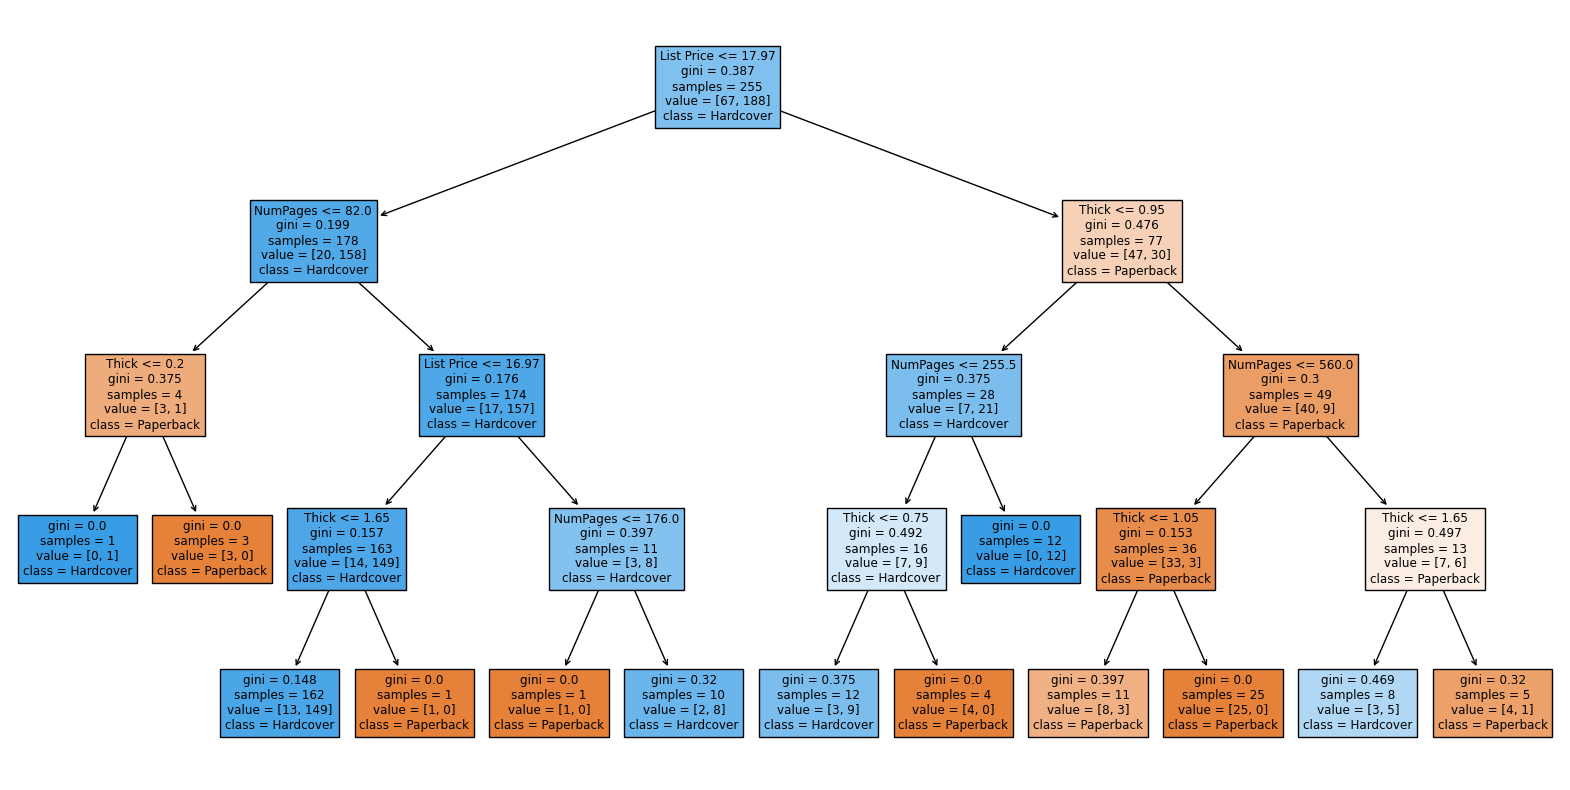

In [10]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, make_scorer
import graphviz as gv

url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
df = pd.read_csv(url, encoding="ISO-8859-1")

ab_reduced = df.drop(['Weight_oz', 'Width', 'Height'], axis=1)

# Remove rows with missing values:
ab_reduced_noNaN = ab_reduced.dropna() 

# Convert data types:
ab_reduced_noNaN['Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
ab_reduced_noNaN['NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)
ab_reduced_noNaN['Hard_or_Paper'] = ab_reduced_noNaN['Hard_or_Paper'].astype('category')

df = df.drop(['Weight_oz', 'Width', 'Height'], axis=1)
df = df.dropna()  # Removing rows with NaN entries
df['Pub year'] = df['Pub year'].astype(int)
df['NumPages'] = df['NumPages'].astype(int)
df['Hard_or_Paper'] = df['Hard_or_Paper'].astype('category')

# The random seed will be set to 130 for the sake of reproducibility
np.random.seed(130)

# Training set (80%)
ab_reduced_noNaN_train = df.sample(frac=0.8)

# Testing set (20%)
ab_reduced_noNaN_test = df.drop(ab_reduced_noNaN_train.index)

X = ab_reduced_noNaN[['NumPages', 'Thick', 'List Price']]

# DecisionTreeClassifier object
clf2 = DecisionTreeClassifier(max_depth=4)

# Training
clf2.fit(ab_reduced_noNaN_train[['NumPages', 'Thick', 'List Price']], 
         ab_reduced_noNaN_train['Hard_or_Paper'])

# Visualization
plt.figure(figsize=(20, 10))  # Adjust figure size for readability
plot_tree(clf2, 
          feature_names=['NumPages', 'Thick', 'List Price'], 
          class_names=['Paperback', 'Hardcover'], 
          filled=True)
plt.show()

This conversation explored using a decision tree classifier to predict whether a book is hardcover or paperback based on features from the Amazon books dataset. The conversation progressively built understanding, moving from simple models to more complex ones, and focused on practical implementation, data pre-processing, and model interpretation.

● Initial Model: The interaction started with training a basic decision tree using only the 'List Price' feature. The conversation highlighted the importance of splitting the data into training and testing sets (df.sample(frac=0.8)), training the model using .fit(...), making predictions with .predict(...), and visualizing the decision tree using plot_tree. This provided a foundational understanding of the decision tree algorithm.

● Introducing Complexity: The conversation progressed to incorporate more features ('NumPages', 'Thick') and increased the max_depth of the tree. This illustrated how decision trees can handle multiple predictors and create more complex decision boundaries. The process of traversing the tree to make predictions based on multiple features was explained in detail.

● Data Pre-processing: A significant part of the conversation focused on loading and pre-processing the Amazon books dataset. This included:

○ Loading the data using pd.read_csv('amazon_books.csv').

○ Removing unnecessary columns using ab.drop(['Weight_oz', 'Width', 'Height'], axis=1).

○ Handling missing values with ab_reduced.dropna().

○ Converting data types using astype(int) and astype('category') for efficiency and analysis purposes.

● Model Interpretation: The conversation emphasized the importance of interpreting the decision tree to understand how predictions are made. It explained how each node represents a decision based on a feature, and the final prediction is determined by the class label of the leaf node reached.
Key Concepts from the Sources:

● Train-Test Split: The sources strongly advocate for splitting data into training and testing sets to assess model generalization and prevent overfitting. The conversation applied this concept practically using df.sample(frac=0.8).

● Model Complexity and Overfitting: The sources stress the need to manage model complexity, especially with decision trees. The use of the max_depth parameter in the conversation exemplifies this, showing how limiting tree depth can mitigate overfitting.

● Importance of Data Pre-processing: The sources underline the significance of data cleaning and pre-processing. The conversation thoroughly demonstrated this through code examples, encompassing removing irrelevant columns, handling missing data, and converting data types. This showcased how practical data preparation is crucial for successful analysis.

● Decision Tree Interpretation: The sources explain the interpretation of decision tree predictions. The conversation illustrated this by breaking down the process of traversing the tree and using the decision rules at each node to arrive at a prediction.

# Question 6

In [32]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, make_scorer
import graphviz as gv

url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
df = pd.read_csv(url, encoding="ISO-8859-1")

clf_pred = clf.predict(ab_reduced_noNaN_test[['List Price']]) # Predictions from clf
clf2_pred = clf2.predict(ab_reduced_noNaN_test[['NumPages', 'Thick', 'List Price']]) # Predictions from clf2
y_test = ab_reduced_noNaN_test['Hard_or_Paper'] # True labels

cm_clf = confusion_matrix(y_test, clf_pred)
cm_clf2 = confusion_matrix(y_test, clf2_pred)

print("Confusion Matrix for clf:\n", cm_clf)
print("\nConfusion Matrix for clf2:\n", cm_clf2)

Confusion Matrix for clf:
 [[14  5]
 [ 3 42]]

Confusion Matrix for clf2:
 [[15  4]
 [ 1 44]]


In [33]:
def calculate_metrics(cm):
    TN, FP, FN, TP = cm.ravel() 
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)
    return accuracy, sensitivity, specificity


accuracy_clf, sensitivity_clf, specificity_clf = calculate_metrics(cm_clf)
accuracy_clf2, sensitivity_clf2, specificity_clf2 = calculate_metrics(cm_clf2)

print("\nMetrics for clf:")
print("Accuracy:", accuracy_clf)
print("Sensitivity:", sensitivity_clf)
print("Specificity:", specificity_clf)

print("\nMetrics for clf2:")
print("Accuracy:", accuracy_clf2)
print("Sensitivity:", sensitivity_clf2)
print("Specificity:", specificity_clf2)


Metrics for clf:
Accuracy: 0.875
Sensitivity: 0.9333333333333333
Specificity: 0.7368421052631579

Metrics for clf2:
Accuracy: 0.921875
Sensitivity: 0.9777777777777777
Specificity: 0.7894736842105263


The clf model correctly identifies 93% of actual hardcover books, which is a high sensitivity, and 73% of actual paperback books, which is also a high specificity. Its overall accuracy is 87.5%, which suggests good performance.

The clf2 model has a Sensitivity of 0.97, which means that  it correctly identifies 93% of actual hardcover books, and has a slightly higher sensitivity than clf. It also correctly identifies 79% of of actual paperback books, which is also a slightly higher specificity than clf. As a result, it's overall accuracy of 92% is higher than that of clf and suggests that it has a better performance than clf.

Summary:

The conversation aimed to create confusion matrices for two models, clf and clf2, using the ab_reduced_noNaN_test dataset. The conversation covered the definition of "positive" and "negative" outcomes in binary classification, as well as the interpretation of an sklearn confusion matrix. The matrix displays the counts of True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN), providing a comprehensive picture of the model's performance. Factors leading to TP, TN, FP, and FN arise from comparing the model's predictions against the actual outcomes. The confusion_matrix function expects y_true as the first argument and y_pred as the second argument. The conversation also highlighted the importance of the Train-Test Split technique for evaluating a model's performance on unseen data. It also drew a parallel between Type I/Type II errors in hypothesis testing and false positive/negative predictions in classification. The conversation aimed to equip the speaker with the necessary knowledge to create and interpret confusion matrices and calculate performance metrics like sensitivity, specificity, and accuracy.

# Question 7

The difference between the two confusion matrices is due to the number of predictor variables used in each model. The first confusion matrix uses only the 'List Price' variable to predict whether a book is hardcover or paperback, while the second confusion matrix uses 'NumPages', 'Thick', and 'List Price'. The confusion matrices for clf and clf2 are better because they are  more complex models that use more information to make predictions. Using more predictor variables can improve the accuracy of the model, leading to better performance on the testing data.

Summary:

The interaction highlights the importance of understanding data types, focusing on numerical and categorical variables, and confusion matrices for classification. It addresses a "ValueError" arising from using a continuous variable as the target variable for the confusion matrix. The response also discusses the significance of interpreting classification metrics, including sensitivity, specificity, and accuracy. Factors influencing metric interpretation include the trade-offs between sensitivity and specificity, the importance of context, the value of confusion matrices for detailed analysis, and the need for a separate test set to assess model generalization. The interaction emphasizes the iterative nature of learning and applying data science principles, emphasizing the need for grasping fundamental concepts, accurate code implementation, and critical evaluation of results. It emphasizes the need to apply theoretical knowledge to practical scenarios and consider the broader context when interpreting results.

# Question 8

/tmp/ipykernel_53/1825010564.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ab_reduced_noNaN['Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
/tmp/ipykernel_53/1825010564.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ab_reduced_noNaN['NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)
/tmp/ipykernel_53/1825010564.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

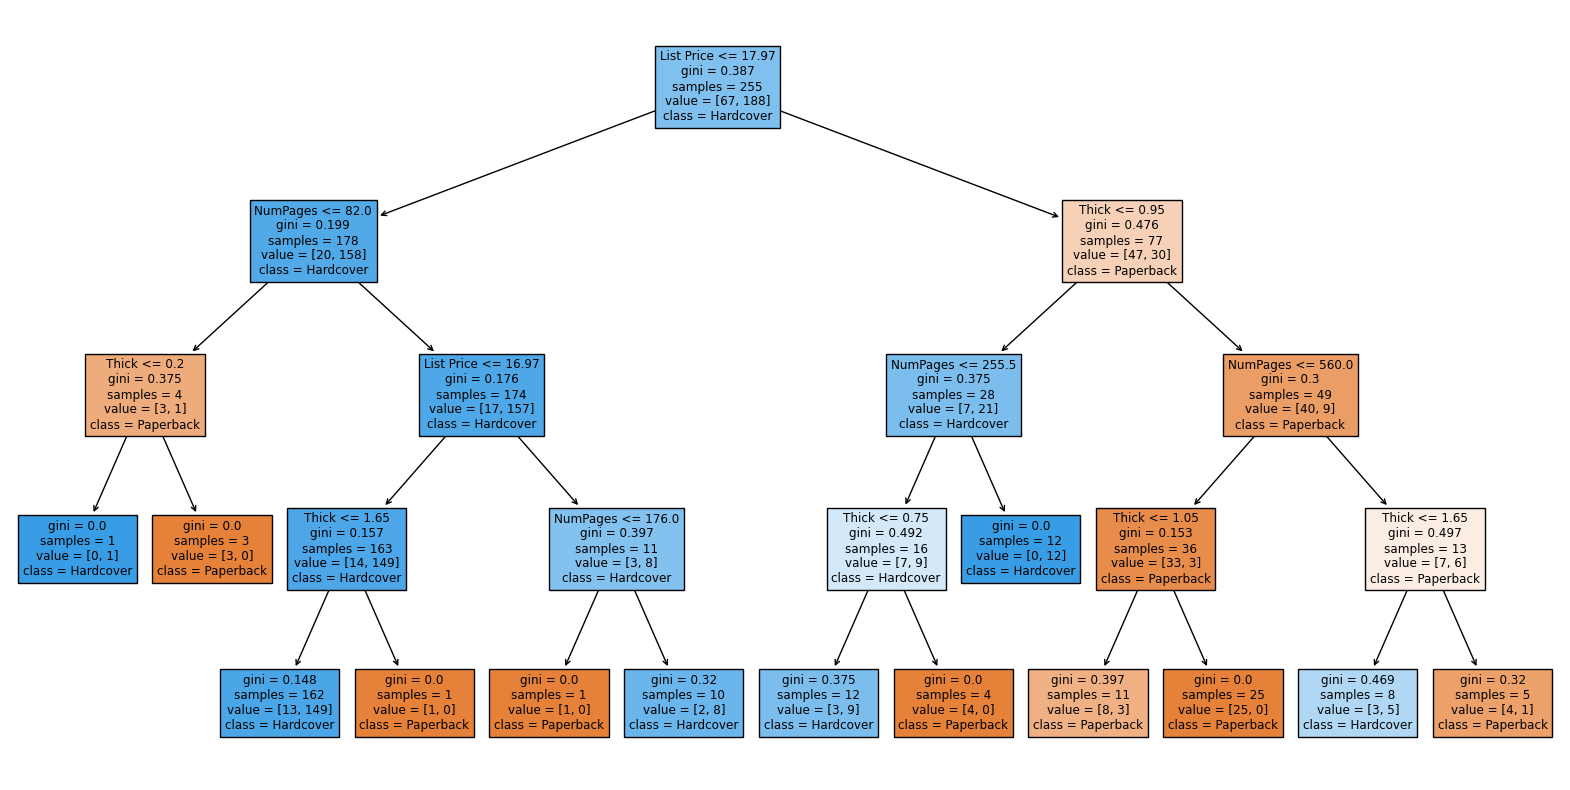

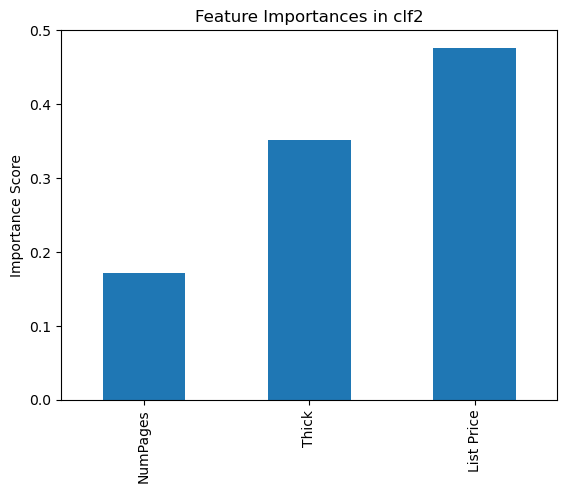

The most important predictor variable in clf2 is: List Price


In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, make_scorer
import graphviz as gv

url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
df = pd.read_csv(url, encoding="ISO-8859-1")

ab_reduced = df.drop(['Weight_oz', 'Width', 'Height'], axis=1)

ab_reduced_noNaN = ab_reduced.dropna() 

ab_reduced_noNaN['Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
ab_reduced_noNaN['NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)
ab_reduced_noNaN['Hard_or_Paper'] = ab_reduced_noNaN['Hard_or_Paper'].astype('category')

df = df.drop(['Weight_oz', 'Width', 'Height'], axis=1)
df = df.dropna()  # Removing rows with NaN entries
df['Pub year'] = df['Pub year'].astype(int)
df['NumPages'] = df['NumPages'].astype(int)
df['Hard_or_Paper'] = df['Hard_or_Paper'].astype('category')

np.random.seed(130)

ab_reduced_noNaN_train = df.sample(frac=0.8)

ab_reduced_noNaN_test = df.drop(ab_reduced_noNaN_train.index)

X = ab_reduced_noNaN[['NumPages', 'Thick', 'List Price']]

clf2 = DecisionTreeClassifier(max_depth=4)

clf2.fit(ab_reduced_noNaN_train[['NumPages', 'Thick', 'List Price']], 
         ab_reduced_noNaN_train['Hard_or_Paper'])

plt.figure(figsize=(20, 10))  
plot_tree(clf2, 
          feature_names=['NumPages', 'Thick', 'List Price'], 
          class_names=['Paperback', 'Hardcover'], 
          filled=True)

importances = clf2.feature_importances_
features = clf2.feature_names_in_

data = pd.Series(importances, index=features)

fig, ax = plt.subplots()
data.plot.bar(ax=ax)
ax.set_title("Feature Importances in clf2")
ax.set_ylabel("Importance Score")
plt.show()

most_important_feature = features[importances.argmax()]
print(f"The most important predictor variable in clf2 is: {most_important_feature}")


The most important predictor variable in clf2 is 'List Price'.

# Question 9

Unlike linear regression, which uses coefficients to quantify the average change in the outcome variable for a one-unit increase in the predictor variable, assuming all other predictors are held constant, decision tree feature importances provide a relative measure of the predictor's influence on the tree's decision-making process rather than a direct quantitative relationship between predictor and outcome. Instead, feature importances in decision trees represent the overall contribution of a predictor variable in explaining the outcome, based on the improvement in prediction accuracy (e.g., measured by Gini impurity or Shannon entropy) attributed to decision rules involving that predictor.

Summary:

The provided response accurately described the differences between interpreting coefficients in linear model regression and feature importances in decision trees.

● Linear Regression: Coefficients in linear regression models quantify the change in the outcome variable for a one-unit increase in a specific predictor variable. This interpretation assumes that other predictor variables in the model remain constant.

● Decision Trees: Feature importances in decision trees reflect a predictor variable's contribution to improving prediction accuracy. For example, the improvement might be measured by Gini impurity or Shannon entropy. Unlike regression coefficients, decision tree feature importances do not provide a specific quantitative relationship between the predictor and outcome variables.
The response highlighted the key distinction that linear regression coefficients offer a direct quantitative interpretation, while decision tree feature importances provide a relative measure of predictor influence.

# Question 10

Yes